In [3]:
import sklearn
print(sklearn.__version__)

1.4.2


### 2. 붓꽃 품종 예측하기

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd

- 데이터셋 확인

In [9]:
iris=load_iris()
iris_data=iris.data#iris.data는 iris에서 피쳐(feature)만으로 된 데이터를 numpy로 기지고 있다.

iris_label=iris.target#iris데이터 셋에서 레이블(결정값) 데이터를 numpy로 가지고 있다.
print(iris_label)
print(iris.target_names)

iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- 학습용 데이터와 테스트용 데이터 분리

In [11]:
#0.2 비율로 테스트 용 데이터 세트를 만든다, random_state를 호출하지 않으면 수행할때마다 다른 학습/테스트용 데이터를 만든다.
X_train,X_test,y_train,y_test=train_test_split(iris_data,iris_label, test_size=0.2,random_state=11)

- 머신러닝 분류알고리즘 중 하나인 의사결정 트리 사용해 학습과 예측 수행 

In [18]:
dt_clf=DecisionTreeClassifier(random_state=11)#객체 생성

In [19]:
dt_clf.fit(X_train,y_train)#학습 수행

DecisionTreeClassifier(random_state=11)

In [20]:
#학습이 완료된 DTC객체에서 테스트 데이터 세트로 예측 수행
pred=dt_clf.predict(X_test)

In [21]:
#예측 성능 평가
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


### 3. 사이킷런의 기반 프레임워크 익히기

In [23]:
from sklearn.datasets import load_iris

iris_data=load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [24]:
keys=iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [25]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### 4. Model Selection 모듈 소개

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

- kfold 교차검증

In [28]:
iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold=KFold(n_splits=5)
cv_accuracy=[]
print(features.shape[0])

150


In [32]:
n_iter=0

#KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index,test_index in kfold.split(features):
    X_train,X_test=features[train_index],features[test_index]
    y_train,y_test=label[train_index],label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    n_iter+=1
    accuracy=np.round(accuracy_score(y_test,pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print(n_iter,accuracy, train_size, test_size)
    print(test_index)
    cv_accuracy.append(accuracy)
print('평균 검증 정확도:',np.mean(cv_accuracy))

1 1.0 120 30
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2 0.9667 120 30
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3 0.8667 120 30
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4 0.9333 120 30
[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5 0.7333 120 30
[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도: 0.9


- Stratified K폴드: 불균형한 분포도를 가진 레이블 데이터 집합을 위한 k폴드 방식(ex) 대출사기)

In [41]:
import pandas as pd
iris=load_iris()
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=3)
n_iter=0

for train_index,test_index in skf.split(iris_df, iris_df['label']):
    n_iter+=1
    label_train=iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print(n_iter)
    print(label_train.value_counts())
    print(label_test.value_counts())

1
label
2    34
0    33
1    33
Name: count, dtype: int64
label
0    17
1    17
2    16
Name: count, dtype: int64
2
label
1    34
0    33
2    33
Name: count, dtype: int64
label
0    17
2    17
1    16
Name: count, dtype: int64
3
label
0    34
1    33
2    33
Name: count, dtype: int64
label
1    17
2    17
0    16
Name: count, dtype: int64


In [53]:
#straitfiedKFold활용해 데이터를 분리
dt_clf=DecisionTreeClassifier(random_state=156)

skfold=StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index,test_index in skfold.split(features,label):
    X_train,X_test=features[train_index],features[test_index]
    y_train,y_test=label[train_index],label[test_index]
    dt_clf.fit(X_train,y_train)
    pred=dt_clf.predict(X_test)
    n_iter+=1
    accuracy=np.round(accuracy_score(y_test,pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print(n_iter,accuracy, train_size,test_size)
    print(n_iter,test_index)
    cv_accuracy.append(accuracy)
print(np.mean(cv_accuracy))

1 0.98 100 50
1 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
2 0.94 100 50
2 [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
3 0.98 100 50
3 [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
0.9666666666666667


- 교차검증을 간편하게 지원해주는 api- cross_val_Score(), cross_validate()(여러개의 평가 지표를 반환가능, 수행시간도 같이 제공)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data=load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

scores=cross_val_score(dt_clf,data,label,scoring='accuracy',cv=3)
print(np.round(scores,4))
print(np.round(np.mean(scores),4))

[0.98 0.94 0.98]
0.9667


- GridSearchCV- 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

### 5. 데이터 전처리

- 레이블 인코딩- 인코딩된 숫자에 가중치를 부여해서는 안되기 때문에 선형 회귀 알고리즘 등에서는 적용하지 않아야 한다.

In [56]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','바지','기차']

encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print(labels)

[0 2 3 1]


In [58]:
print(encoder.classes_)

['TV' '기차' '냉장고' '바지']


In [60]:
print(encoder.inverse_transform([3,2,1,0,2]))#디코딩

['바지' '냉장고' '기차' 'TV' '냉장고']


- 원-핫 인코딩- 피쳐 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방법

In [64]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
items=np.array(items).reshape(-1,1)

oh_encoder=OneHotEncoder()
oh_encoder.fit(items)
oh_labels=oh_encoder.transform(items)

print(oh_labels.toarray())
print(oh_labels.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


In [65]:
#get_dummies()이용하면 문자열 카테고리 값을 숫자 형으로 변환할 필요없이 바로 변환할 수 있다.
import pandas as pd
df=pd.DataFrame({'items':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


- 피처 스케일링과 정규화

### 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
titanic_df=pd.read_csv('./train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
print('\n ### 학습 데이터 정보 ###\n')
print(titanic_df.info())


 ### 학습 데이터 정보 ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [20]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

C:\Users\a0103\AppData\Local\Temp\ipykernel_12780\3896692854.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
C:\Users\a0103\AppData\Local\Temp\ipykernel_12780\3896692854.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [23]:
titanic_df.isnull().sum().sum()

0

In [25]:
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [26]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [27]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

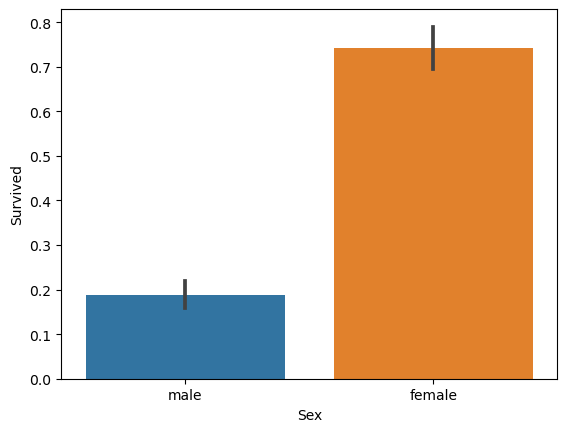

In [28]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

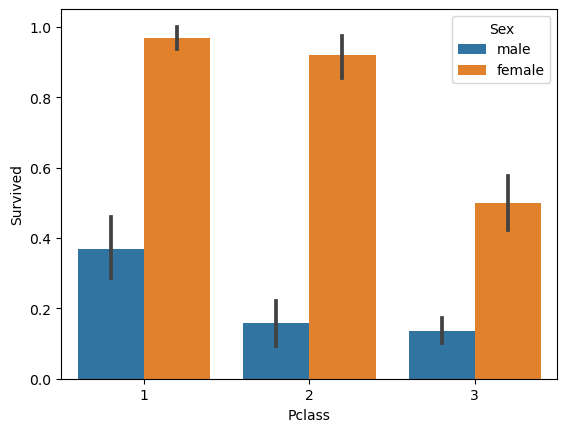

In [29]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [30]:
def get_category(age):
    cat=''
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'
    return cat
        

In [32]:
plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student', 'Young Adult','Adult','Elderly']

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age_cat', ylabel='Survived'>

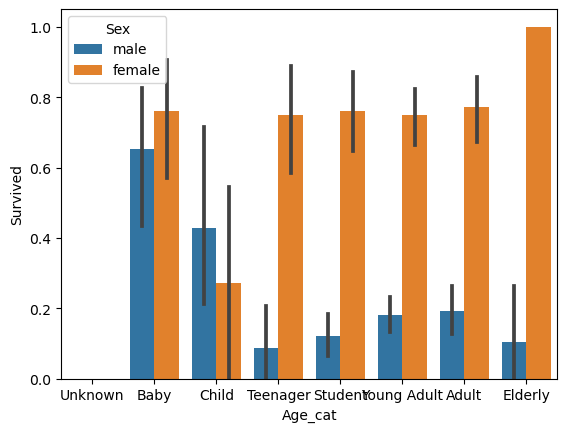

In [34]:
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)

In [35]:
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])

    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [41]:
## 전처리 함수 정리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
def format_features(df):
    df['Cabin']=titanic_df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [42]:
titanic_df=pd.read_csv('./train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df=transform_features(X_titanic_df)

C:\Users\a0103\AppData\Local\Temp\ipykernel_12780\3428623841.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\a0103\AppData\Local\Temp\ipykernel_12780\3428623841.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression(solver='liblinear')

In [47]:
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print(accuracy_score(y_test,dt_pred))

0.7877094972067039


In [49]:
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print(accuracy_score(y_test,rf_pred))

0.8547486033519553


In [50]:
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print(accuracy_score(y_test,rf_pred))

0.8547486033519553


In [53]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold=KFold(n_splits=folds)
    scores=[]

    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test=X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train, y_test=y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        accuracy=accuracy_score(y_test,pred)
        scores.append(accuracy)
        
        print(iter_count,accuracy)

    mean_score=np.mean(scores)
    print(mean_score)

exec_kfold(dt_clf,folds=5)

0 0.7541899441340782
1 0.7808988764044944
2 0.7865168539325843
3 0.7696629213483146
4 0.8202247191011236
0.782298662984119


In [55]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print(iter_count,accuracy)

print(np.mean(scores))

0 0.7430167597765364
1 0.7752808988764045
2 0.7921348314606742
3 0.7865168539325843
4 0.8426966292134831
0.7879291946519366
